<a href="https://colab.research.google.com/github/loc43/laba/blob/dev/lab_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если набран как минимум 1 балл.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [2]:
%%bash
gdown 1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3

Downloading...
From: https://drive.google.com/uc?id=1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3
To: /content/coins.csv
100%|██████████| 3.98M/3.98M [00:00<00:00, 276MB/s]


Начнем с необходимых приготовлений.

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла `coins.csv`. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [4]:
coins = pd.read_csv('/content/coins.csv')

Посмотрим что получилось

In [ ]:
coins.head(4)

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
datetime,,,,,,,,,,,,,
2013-04-28,2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [5]:
len(coins.groupby(['name']))


70

### 2. За какой период данные мы имеем? (0.4 балла)

In [6]:
coins['date'].min(), coins['date'].max()

('2013-04-28', '2018-06-06')

### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [7]:
coins.isnull().values.any()

True

Посмотрим, в каких колонках и в каком количестве присутствуют пропуски.

In [12]:
coins[coins.isnull().values].isna().sum()

date                  0
price               688
txCount            4577
txVolume           5197
activeAddresses    4577
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64

Больше всего их в колонках, связанных с транзакциями монет (число транзакций, объем, число адресов). Это можно объяснить тем, что для большинства транзакций не были сохранены данные о них.

### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [13]:
coins[coins['price']== coins['price'].max()][['date', 'name']] 

,date,name
25971,2017-12-17,Bitcoin


### 5. У какой монеты самая высокая и самая низкая средняя капитализация (среднее арифметическое капитализаций за все доступные дни)? Постройте круговую диаграмму с долями. (0.5 балла)

In [10]:
df_mean = coins.groupby('name').mean()['market']
df_mean = df_mean.reset_index()

status = pd.DataFrame.from_dict({'status': ['min', 'max'], 
                                 'name': [df_mean[df_mean['market'] == df_mean['market'].min()]['name'][34],
                                          df_mean[df_mean['market'] == df_mean['market'].max()]['name'][7]],
                                 'mean_market': [df_mean[df_mean['market'] == df_mean['market'].min()]['market'][34],
                                                 df_mean[df_mean['market'] == df_mean['market'].max()]['market'][7]]})
status


<ipython-input-10-c4194b4d0d73>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = coins.groupby('name').mean()['market']


,status,name,mean_market
0,min,KingN Coin,4.160098e+04
1,max,Bitcoin,3.078214e+10


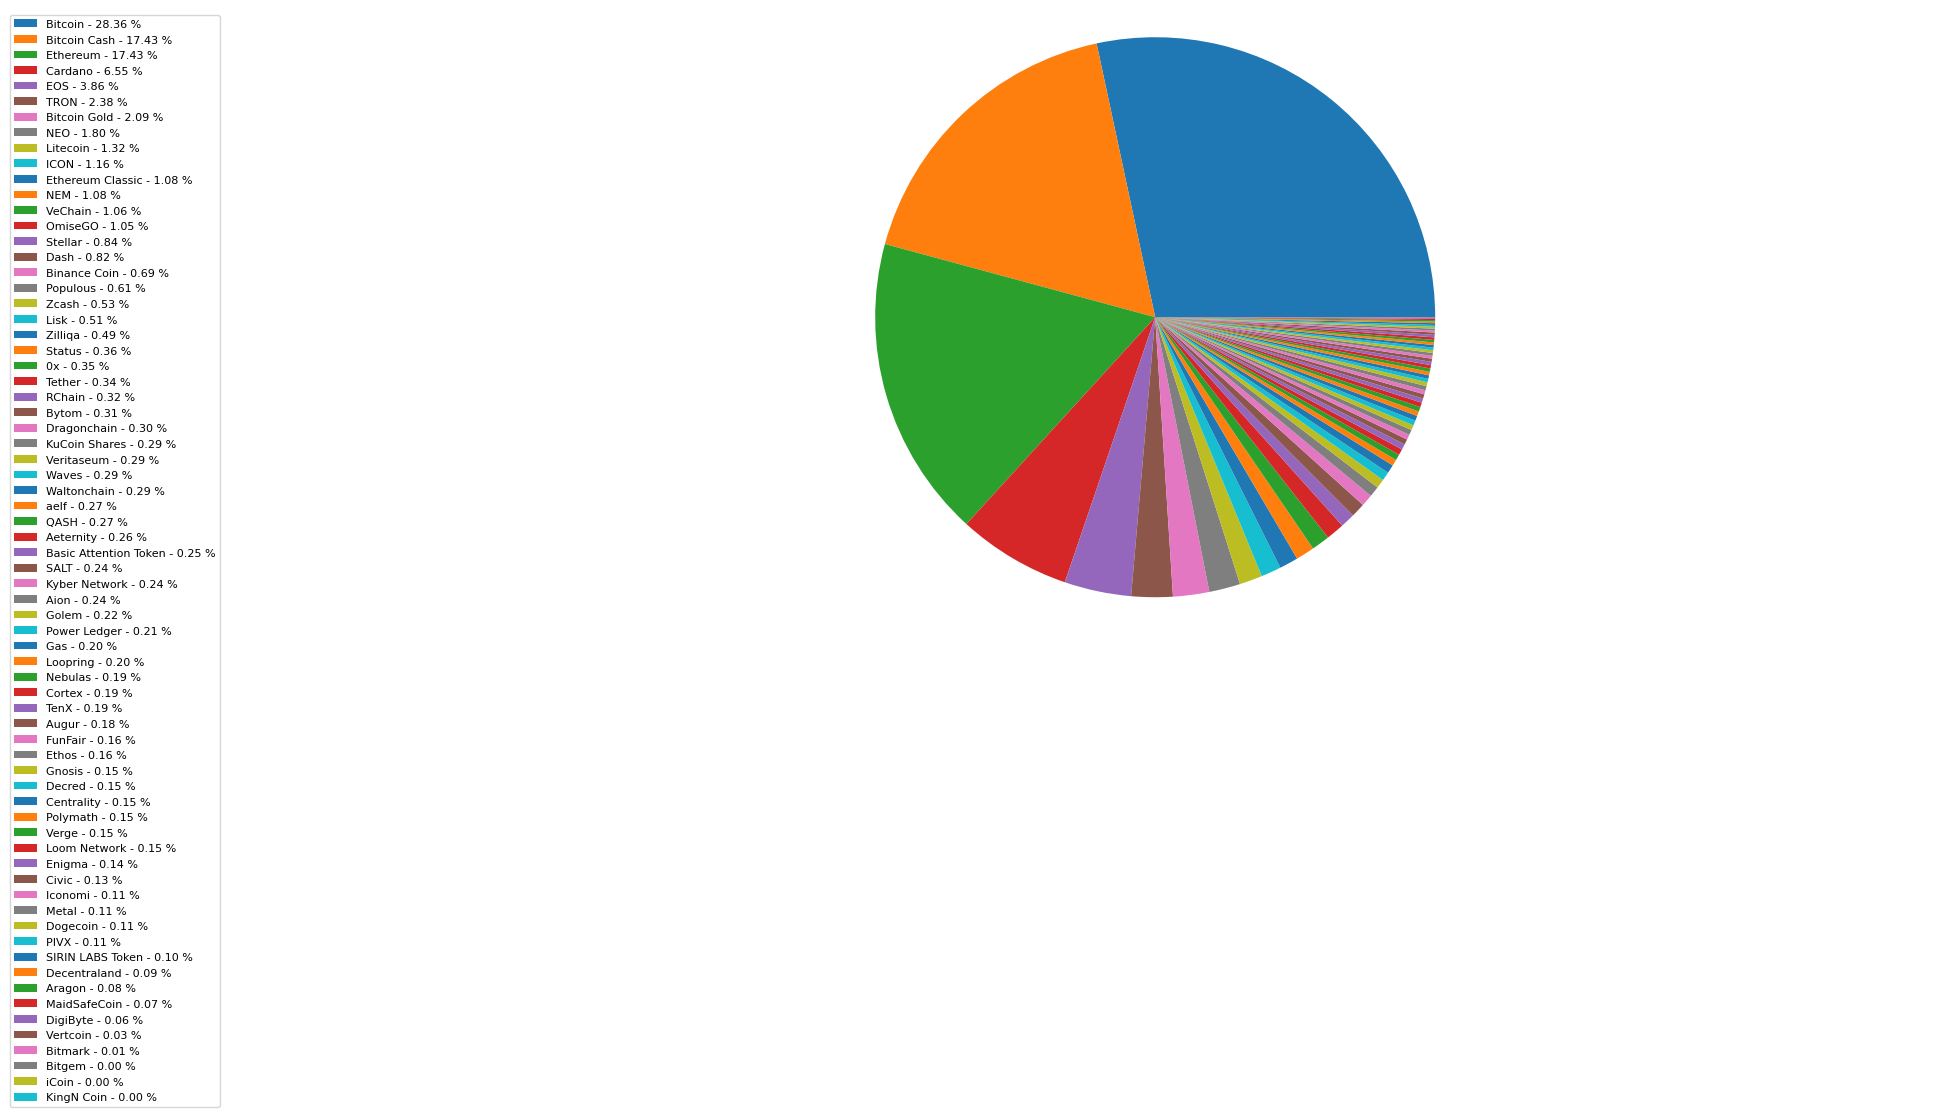

In [11]:
plt.figure(figsize=(20, 8))

df_mean = df_mean.sort_values(by='market', ascending=False)
percent = 100 * df_mean['market']/df_mean['market'].sum()

labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(df_mean['name'], percent)]

ax = df_mean['market'].plot(kind='pie', labels=None)
ax.axis('equal')
ax.yaxis.label.set_visible(False)
ax.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=8)
plt.show()

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `candlestick_ohlc` (`from mplfinance.original_flavor import candlestick_ohlc`), но можно и без него.

In [14]:
!pip install mplfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 6.4 MB/s eta 0:00:00


In [15]:
import mplfinance as mpf

def plot_fancy_price_action(coins, symbol, start_date, end_date):
    df = coins[(coins['date'] >= start_date) & (coins['date'] <= end_date) & (coins['symbol'] == symbol)]

    df_price = pd.DataFrame({'Date': df['date'], 'Open': df['open'], 'Close': df['close'],
                             'High': df['high'], 'Low': df['low']})
    
    ohlc = df_price[['Date', 'Open', 'High', 'Low', 'Close']].copy()
    ohlc['Date'] = pd.to_datetime(ohlc['Date'])
    ohlc = ohlc.set_index('Date')

    fig, ax = mpf.plot(ohlc, type='candle', style='charles', title='Цены ' + symbol + ' за период ({0}  -  {1})'.format(start_date, end_date),
                       ylabel='Цена, USD', figratio=(16,8), datetime_format='%Y-%m-%d',
                       addplot=[mpf.make_addplot(df_price['Low'], color='r'),
                                mpf.make_addplot(df_price['High'], color='g')], returnfig=True)
    
    start_price = df_price['Close'].iloc[0]
    end_price = df_price['Close'].iloc[-1]

    ax[0].axhline(y=start_price, color='r', linestyle='--', linewidth=2, label='цена начала продаж')
    ax[0].axhline(y=end_price, linestyle='--', linewidth=2, label='цена конца продаж')

    ax[0].set_xlabel('Дата')
    ax[0].xaxis_date()
    ax[0].grid(True)
    ax[0].legend()

    mpf.show()

Посмотрим, что получилось:

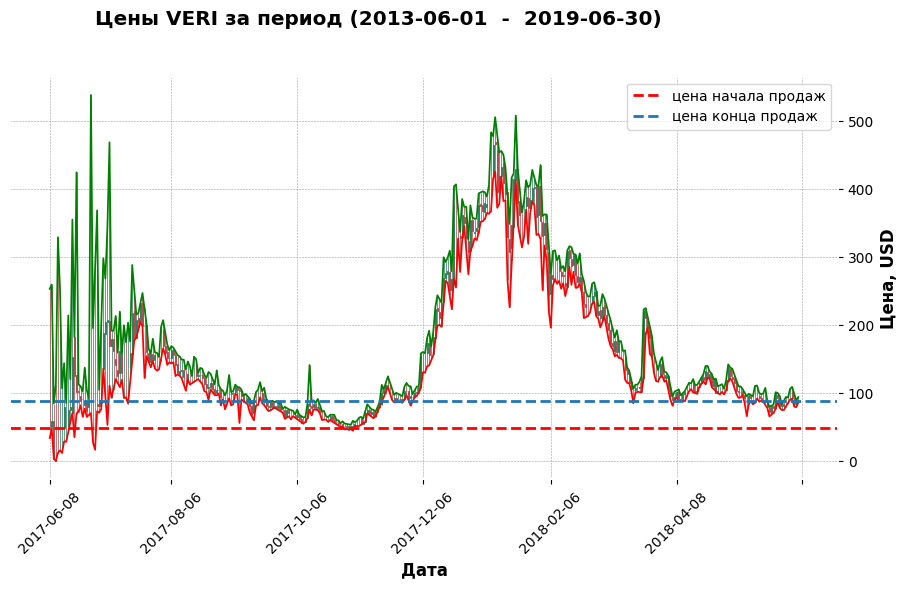

In [16]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30') 

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс). 

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [17]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    pnd = []
    df = coins[(coins['symbol'] == symbol) & (coins['date'] >= start_date) 
                & (coins['date'] <= end_date)]
    df['pnd'] = df['high']/df[['open', 'close']].values.max()
    return pd.DataFrame.from_dict({'max_pnd': df['pnd'].max(), 
                                   'date': df[df['pnd'] == df['pnd'].max()]['date']})

In [18]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

<ipython-input-17-9b1c91f54a05>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pnd'] = df['high']/df[['open', 'close']].values.max()


,max_pnd,date
25971,1.030343,2017-12-17


Сравните эти значения для разных монет:

In [19]:
pnds = pd.DataFrame.from_dict({'coin': coins['symbol'].unique()})
pnds['pnd'] = pnds.apply(lambda x:  find_most_severe_pump_and_dump(coins, x['coin'], start_date='2013-05-28', end_date='2018-06-06').iloc[0]['max_pnd'], axis=1)
pnds['date'] = pnds.apply(lambda x:  find_most_severe_pump_and_dump(coins, x['coin'], start_date='2013-05-28', end_date='2018-06-06').iloc[0]['date'], axis=1)
pnds = pnds.sort_values(by='pnd', ascending=False)
pnds

,coin,pnd,date
34,BTM,1.880117,2018-03-13
20,ZEC,1.383948,2016-10-29
46,TRX,1.337926,2018-01-05
36,CVC,1.229630,2017-12-25
28,PAY,1.180673,2017-07-06
...,...,...,...
45,KNC,1.010063,2018-01-14
9,USDT,1.008264,2015-02-25
63,CENNZ,1.008045,2018-04-25
23,ANT,1.007792,2018-01-07


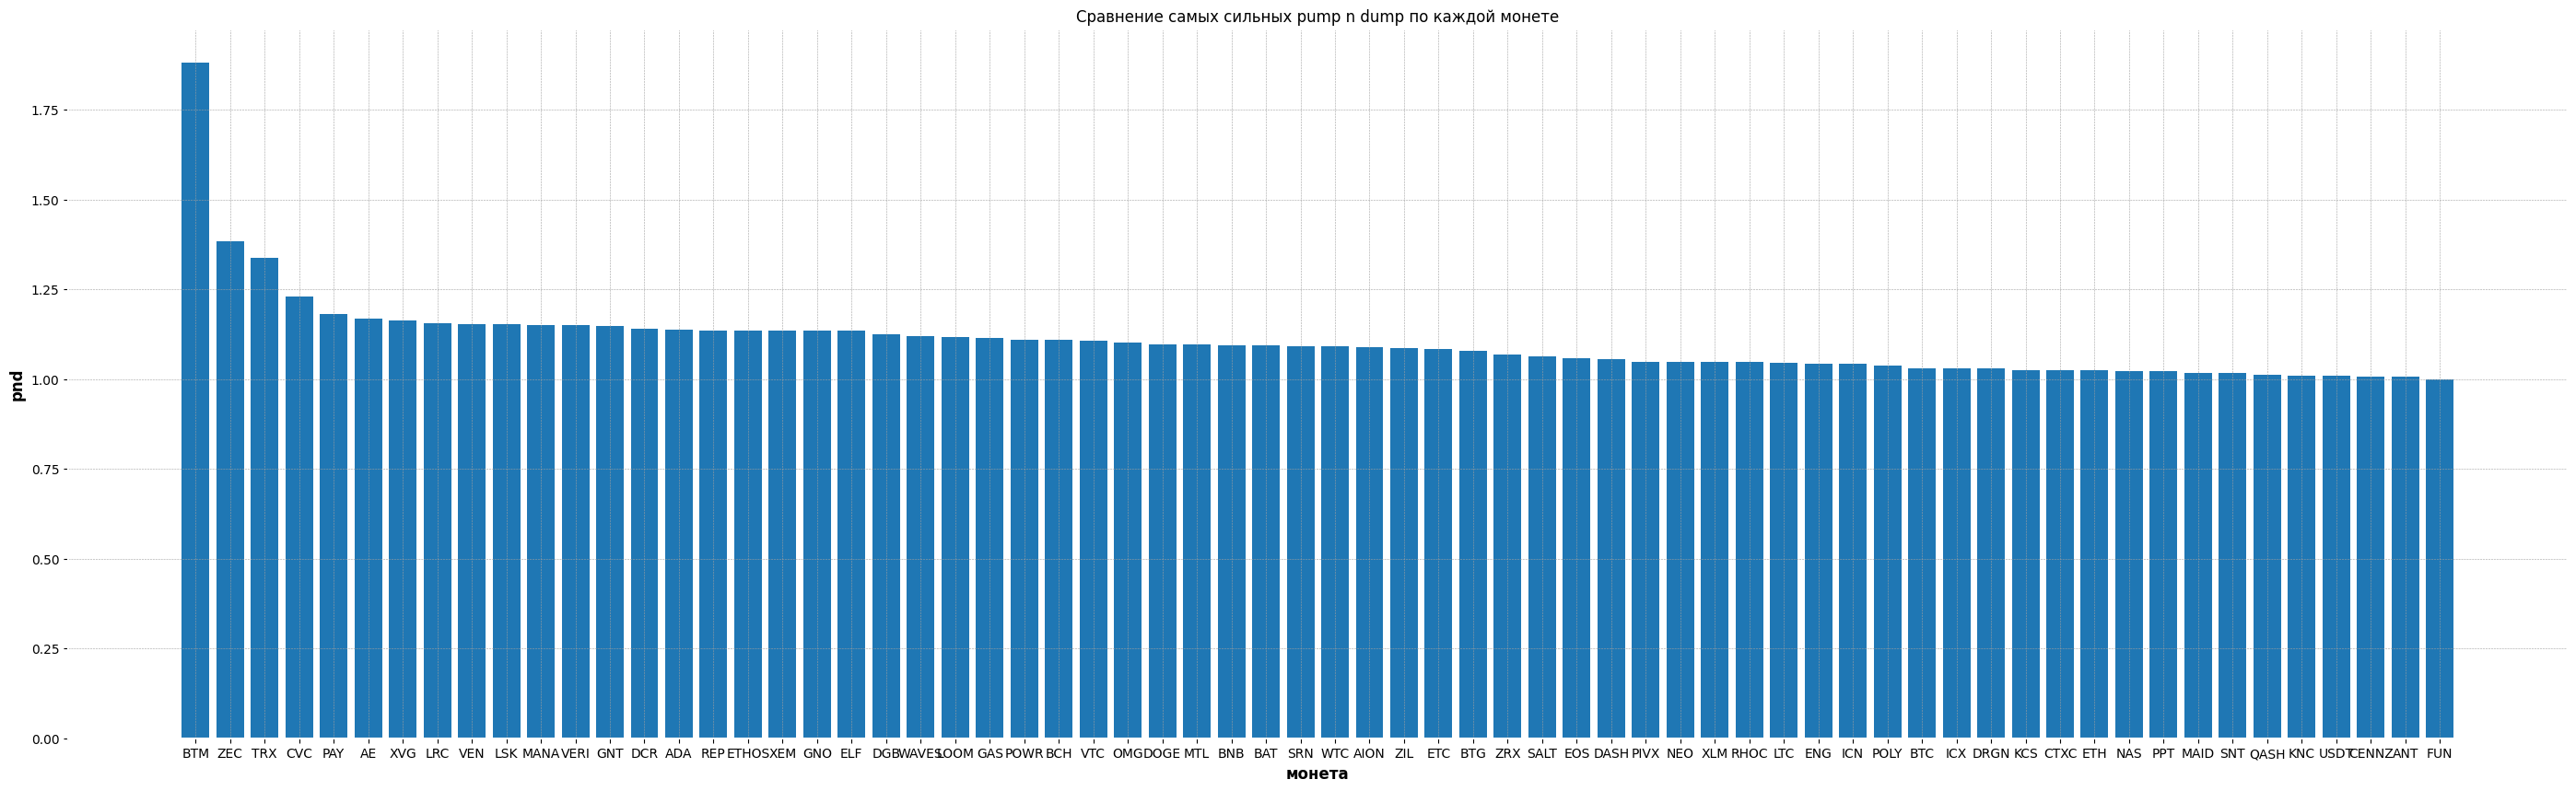

In [20]:
plt.figure(figsize=(35, 10))

plt.bar(pnds['coin'], pnds['pnd'])
plt.title('Сравнение самых сильных pump n dump по каждой монете')
plt.xlabel('монета')
plt.ylabel('pnd')

plt.show()

## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени. 

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [21]:
def compute_roi(coins, investments, start_date, end_date):
    roi_start = []
    roi_end = []
    for c in investments.items():
        roi_start.append(coins[(coins['date'] == start_date) & (coins['symbol'] == c[0])]['price'] * c[1])

        roi_end.append(coins[(coins['date'] == end_date) & (coins['symbol'] == c[0])]['price'] * c[1])


    return (np.array(roi_end) - np.array(roi_start)).sum()


In [22]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

36350.0

In [23]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

7555595.0

## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто: 

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [24]:

def plot_bollinger_bands(coins, symbol, window, width):
    plt.figure(figsize=(15, 8))
    
    df = coins[coins['symbol'] == symbol][['date', 'price']]

    df_mean = df['price'].rolling(window).mean()
    df_std = df['price'].rolling(window).std()

    plt.plot(df['date'], df_mean, label = 'mean')
    plt.plot(df['date'], df_std, label='std')
    plt.plot(df['date'], df['price'], label='price')

    bollinger_up = df_mean + width * df_std
    bollinger_floor = df_mean - width * df_std

    plt.plot(df['date'], bollinger_up, label='Bollindger upper border')
    plt.plot(df['date'], bollinger_floor, label='Bollinger lower border')

    plt.title('Техничекий анализ')
    plt.xlabel('дата')
    plt.ylabel('цена')

    plt.locator_params(axis='x', nbins=10)

    plt.legend()

    plt.show();

<ipython-input-24-a07ee028a057>:23: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=10)


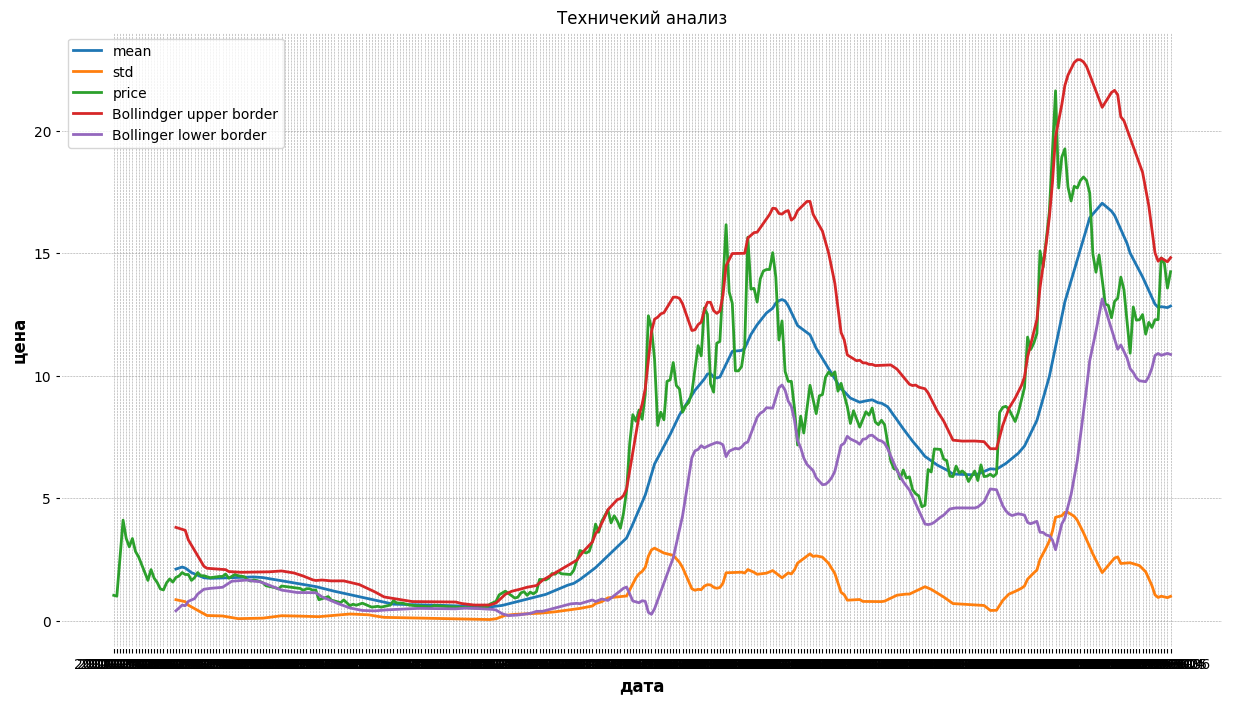

In [25]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

Да


## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка. 

При этом используйте данные начиная с 2017-07-01.

In [ ]:
def plot_coins_capitalizations(coins, symbols, start_date):
    # Paste your code here

In [ ]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

**Ваш ответ тут**

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [ ]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    # Paste your code here

In [ ]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

Довольно интересно ещё взглянуть на 2017-12-27:

In [ ]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

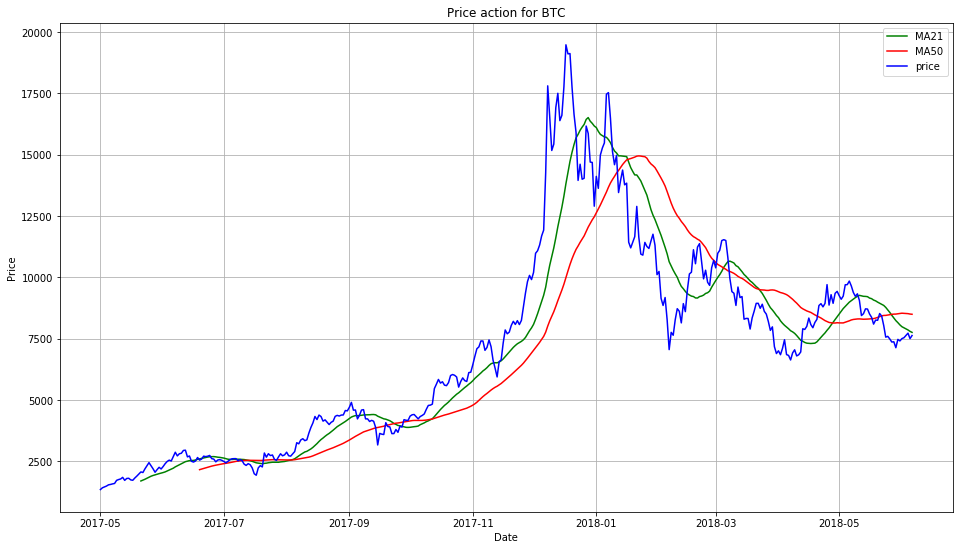

In [ ]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    
    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show() 

plot_moving_averages(
    coins=coins, 
    symbol='BTC', 
    leading_window=21, 
    lagging_window=50, 
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия/


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

Иными словами сравниваем 2 подхода:
- сразу в начальный момент времени купить крипты на все деньги - обычное инвестирование
- ждать подходящих моментов и покупать только в них равными порциями - стратегия

Считайте, что суммарное количество вложенных денег в обоих подходах одинаковое.

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [ ]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    # Paste your code here

In [ ]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21, 
    min=1, 
    max=200, 
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1, 
    max=200, 
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0, 
    max=0.20, 
    step=0.001, 
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

**Ваш ответ тут**

## 9. Отказ от ответственности 

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.